<a href="https://colab.research.google.com/github/alwaysalearner1234/ML03/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

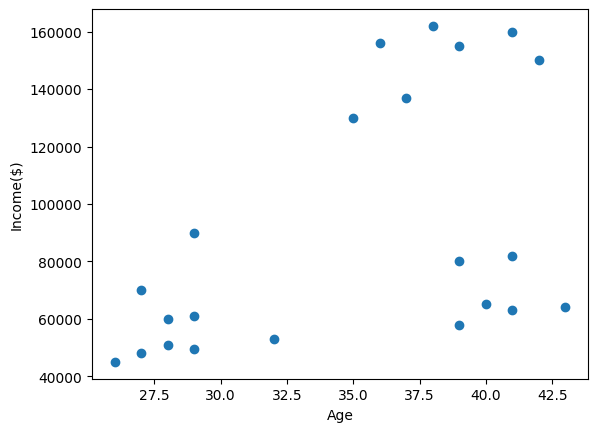

In [6]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [8]:
df['cluster']=y_predicted
df.head()


,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


In [9]:
km.cluster_centers_


array([[3.60000000e+01, 1.33500000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05]])

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("heart.csv")

# Select features for clustering
X = df[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_predicted = kmeans.fit_predict(X_scaled)

# Add cluster column
df['cluster'] = y_predicted

# Show first few rows
print(df.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  cluster  
0              N      0.0       Up             0        1  
1              N      1.0     Flat             1        1  
2              N      0.0       Up             0        1  
3              Y      1.5     Flat             1        2  
4              N      0.0       Up             0        2  


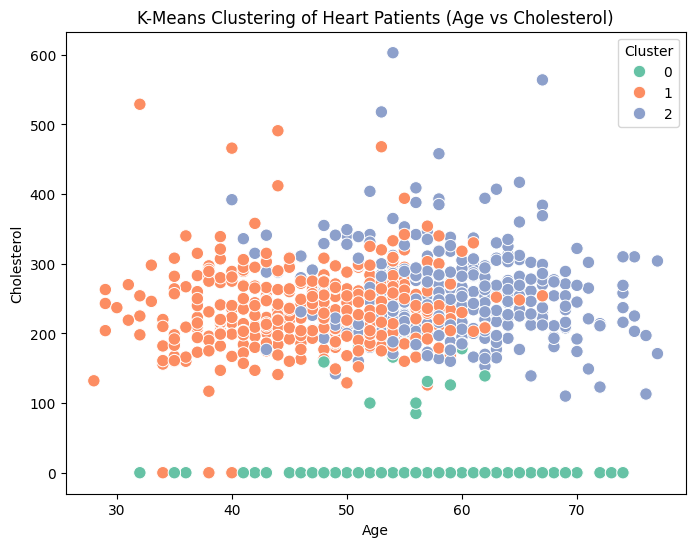

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1️⃣ Load dataset
df = pd.read_csv("heart.csv")

# 2️⃣ Select numeric features for clustering
X = df[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']]

# 3️⃣ Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_predicted = kmeans.fit_predict(X_scaled)

# 5️⃣ Add cluster column
df['cluster'] = y_predicted

# 6️⃣ Visualize clusters (Age vs Cholesterol for example)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Cholesterol',
    hue='cluster',
    palette='Set2',
    s=80
)
plt.title("K-Means Clustering of Heart Patients (Age vs Cholesterol)")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend(title='Cluster')
plt.show()


In [12]:
km.cluster_centers_


array([[3.60000000e+01, 1.33500000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05]])

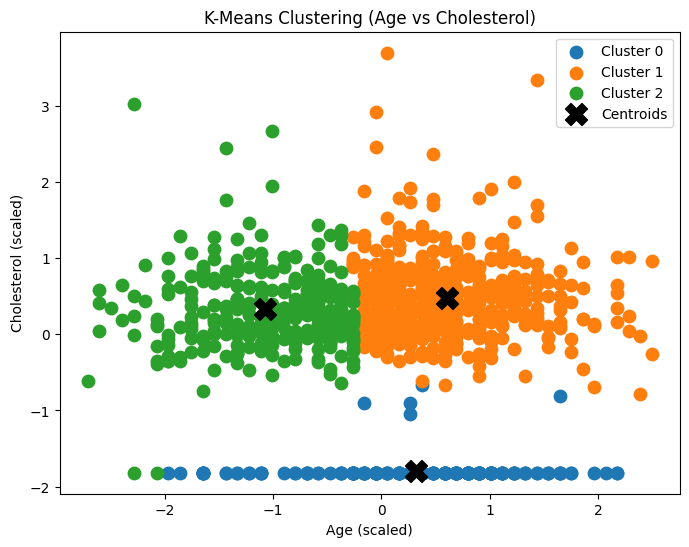

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1️⃣ Load dataset
df = pd.read_csv("heart.csv")

# 2️⃣ Select numeric features for clustering visualization
X = df[['Age', 'Cholesterol']]

# 3️⃣ Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Apply K-Means clustering
k = 3  # number of clusters
km = KMeans(n_clusters=k, random_state=42)
y_predicted = km.fit_predict(X_scaled)

# 5️⃣ Add cluster column to dataframe
df['cluster'] = y_predicted

# 6️⃣ Plot clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in range(k):
    plt.scatter(
        X_scaled[y_predicted == cluster, 0],  # Age
        X_scaled[y_predicted == cluster, 1],  # Cholesterol
        label=f'Cluster {cluster}',
        s=80
    )

# Plot centroids
plt.scatter(
    km.cluster_centers_[:, 0],  # centroid Age
    km.cluster_centers_[:, 1],  # centroid Cholesterol
    s=250,
    color='black',
    marker='X',
    label='Centroids'
)

plt.title("K-Means Clustering (Age vs Cholesterol)")
plt.xlabel("Age (scaled)")
plt.ylabel("Cholesterol (scaled)")
plt.legend()
plt.show()


Preprocessing using min max scaler

In [14]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

KeyError: "None of [Index(['Income($)'], dtype='object')] are in the [columns]"

In [ ]:
print(df.columns.tolist())


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of numeric columns to scale
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform all numeric columns at once
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Now all numeric columns are scaled between 0 and 1
print(df.head())


In [ ]:
df.head()


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['MaxHR'])
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot with color based on HeartDisease
plt.scatter(df['Age'], df['MaxHR'], c=df['HeartDisease'], cmap='coolwarm', alpha=0.7)

# Labels and title
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate colored by Heart Disease')

# Colorbar to show what the colors mean
plt.colorbar(label='HeartDisease')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Separate the DataFrame into two groups
no_disease = df[df['HeartDisease'] == 0]
has_disease = df[df['HeartDisease'] == 1]

# Scatter plots with different markers
plt.scatter(no_disease['Age'], no_disease['MaxHR'], marker='o', color='blue', label='No Heart Disease')
plt.scatter(has_disease['Age'], has_disease['MaxHR'], marker='x', color='red', label='Heart Disease')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate by Heart Disease')

# Legend
plt.legend()

plt.show()


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df[['Age', 'Cholesterol']])
df['cluster'] = y_predicted


In [17]:

df['cluster']=y_predicted
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,cluster
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,2
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,2
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [16]:
km.cluster_centers_


array([[ 0.3228215 , -1.79120261],
       [ 0.60876377,  0.47960182],
       [-1.07046146,  0.33807147]])

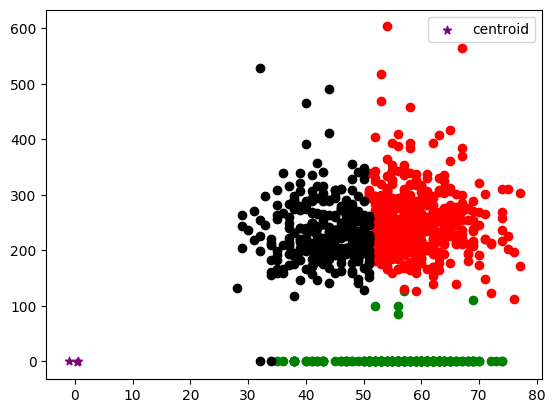

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Cholesterol'],color='green')
plt.scatter(df2.Age,df2['Cholesterol'],color='red')
plt.scatter(df3.Age,df3['Cholesterol'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow Plot


In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Cholesterol']])
    sse.append(km.inertia_)

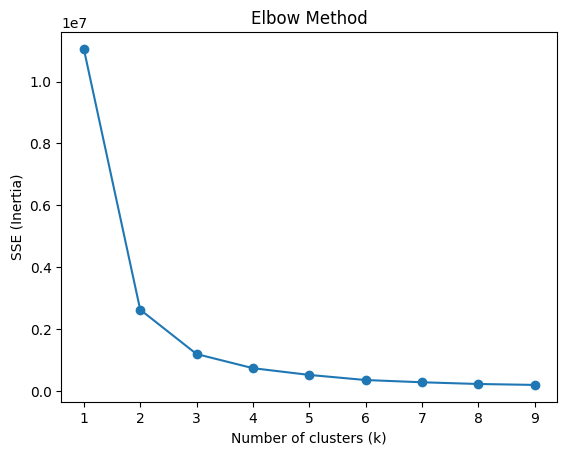

In [20]:
import matplotlib.pyplot as plt

plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.show()


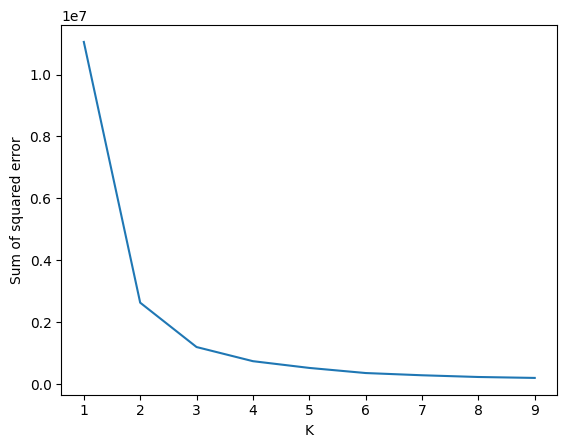

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Keep only petal length and width
df = df[['petal length (cm)', 'petal width (cm)']]
df.head()


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [23]:
print(df.describe())


       petal length (cm)  petal width (cm)
count         150.000000        150.000000
mean            3.758000          1.199333
std             1.765298          0.762238
min             1.000000          0.100000
25%             1.600000          0.300000
50%             4.350000          1.300000
75%             5.100000          1.800000
max             6.900000          2.500000


In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)


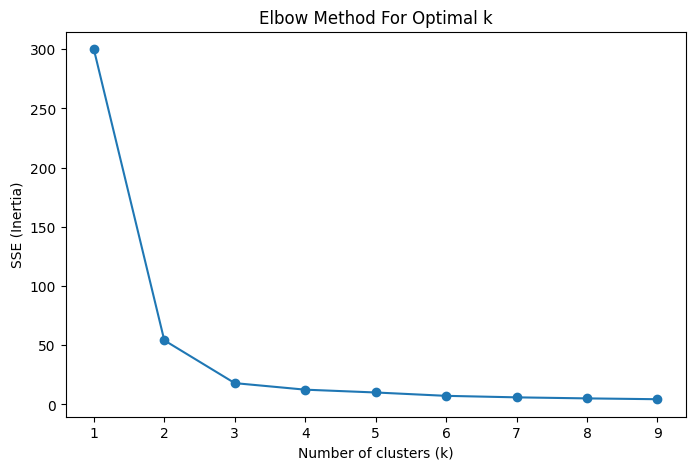

In [25]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    sse.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [26]:
# From elbow plot, we usually see k=3 for Iris dataset
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to dataframe
df['Cluster'] = clusters
df.head()


,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


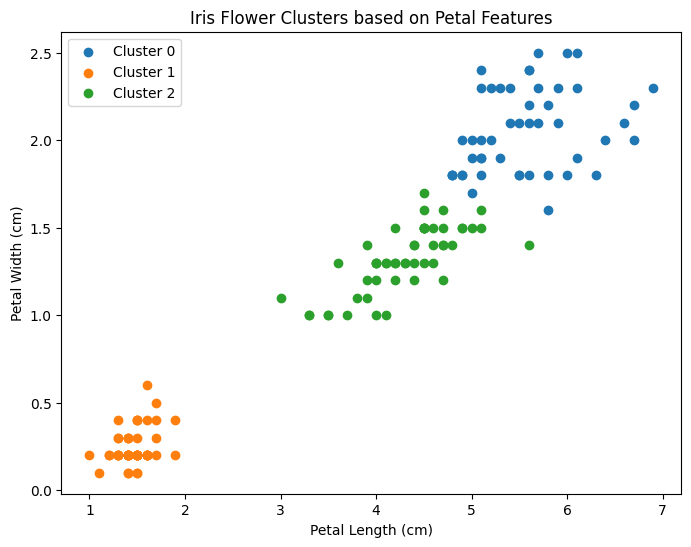

In [27]:
plt.figure(figsize=(8,6))
for i in range(optimal_k):
    plt.scatter(df[df['Cluster']==i]['petal length (cm)'],
                df[df['Cluster']==i]['petal width (cm)'],
                label=f'Cluster {i}')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Flower Clusters based on Petal Features')
plt.legend()
plt.show()


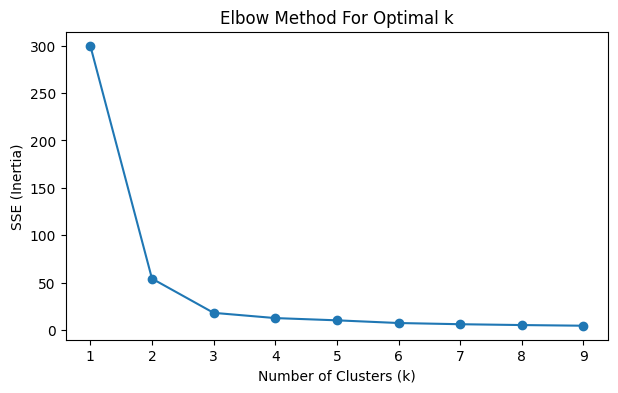

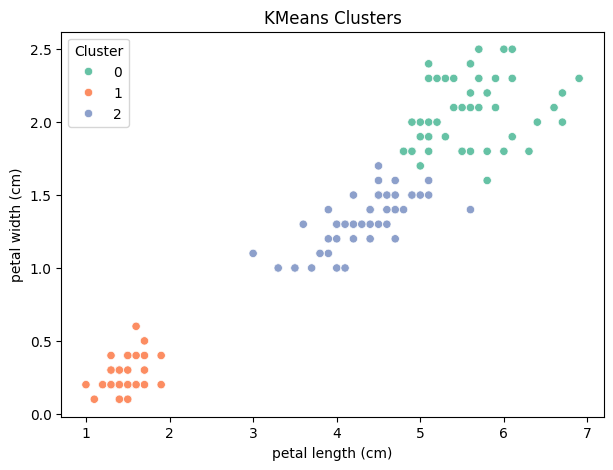

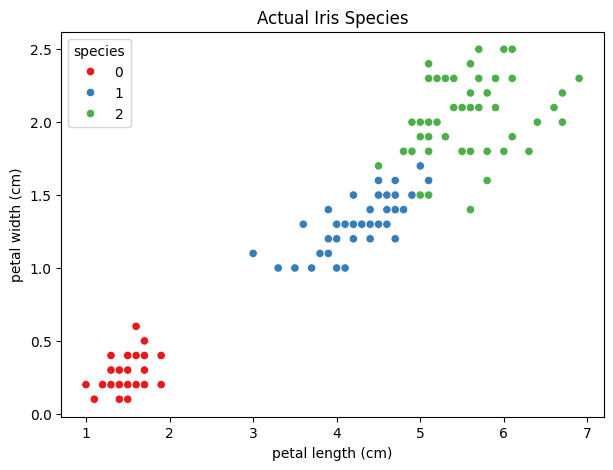


Cluster vs Actual Species Comparison:

species   0   1   2
Cluster            
0         0   2  46
1        50   0   0
2         0  48   4


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Step 1: Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # actual species labels

# Step 2: Use only petal features
X = df[['petal length (cm)', 'petal width (cm)']]

# Step 3: Feature scaling
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Step 4: Elbow method to find optimal k
sse = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_X)
    sse.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.show()

# Step 5: From elbow plot, choose k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_X)

# Step 6: Visualize KMeans clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='Cluster', data=df, palette='Set2')
plt.title('KMeans Clusters')
plt.show()

# Step 7: Visualize Actual Species
plt.figure(figsize=(7,5))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df, palette='Set1')
plt.title('Actual Iris Species')
plt.show()

# Step 8: Compare Cluster vs Actual Species
comparison = pd.crosstab(df['Cluster'], df['species'])
print("\nCluster vs Actual Species Comparison:\n")
print(comparison)


For n_clusters = 2, Average Silhouette Score = 0.743


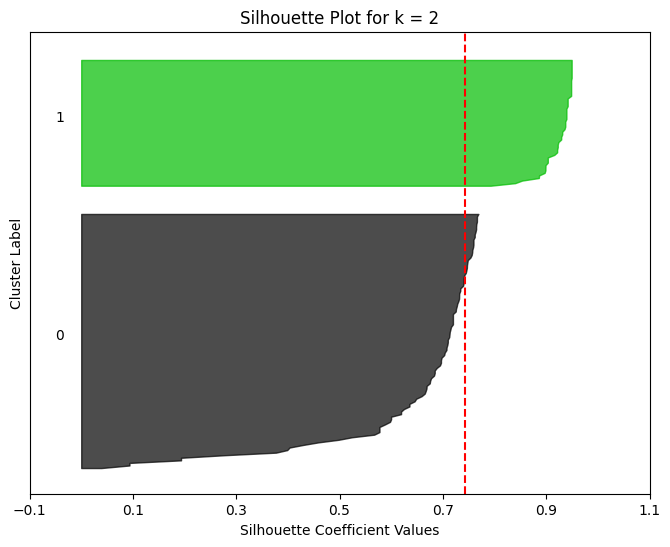

For n_clusters = 3, Average Silhouette Score = 0.674


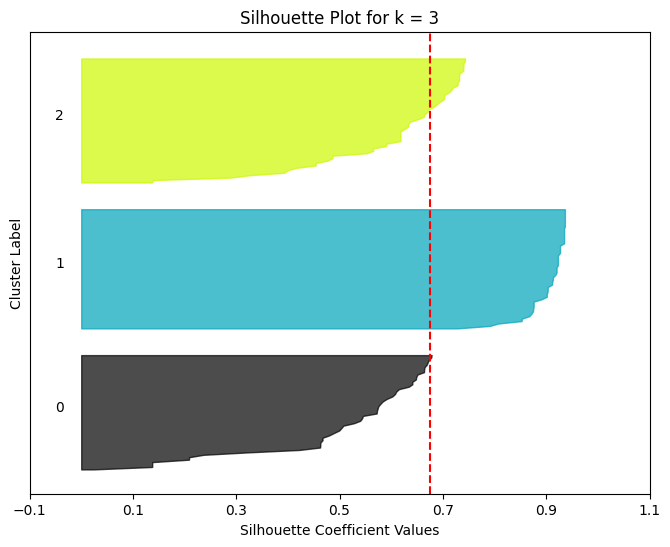

For n_clusters = 4, Average Silhouette Score = 0.586


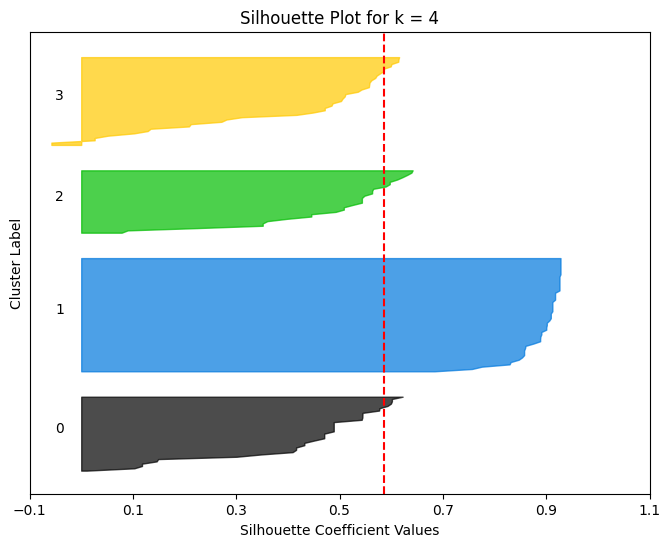

For n_clusters = 5, Average Silhouette Score = 0.567


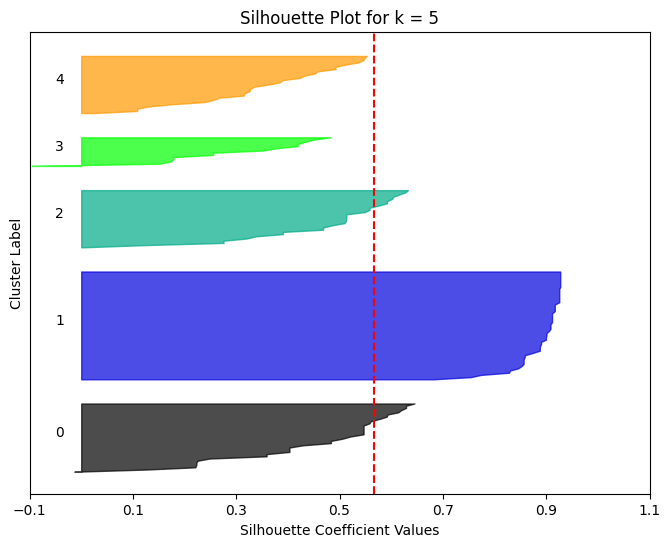

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Range of cluster numbers to test
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create subplot for each k
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    # Limits for the silhouette coefficient values
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(scaled_X) + (n_clusters + 1) * 10])

    # Initialize the clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_X)

    # Compute silhouette scores
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    sample_silhouette_values = silhouette_samples(scaled_X, cluster_labels)

    print(f"For n_clusters = {n_clusters}, Average Silhouette Score = {silhouette_avg:.3f}")

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # gap between clusters

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_title(f"Silhouette Plot for k = {n_clusters}")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()


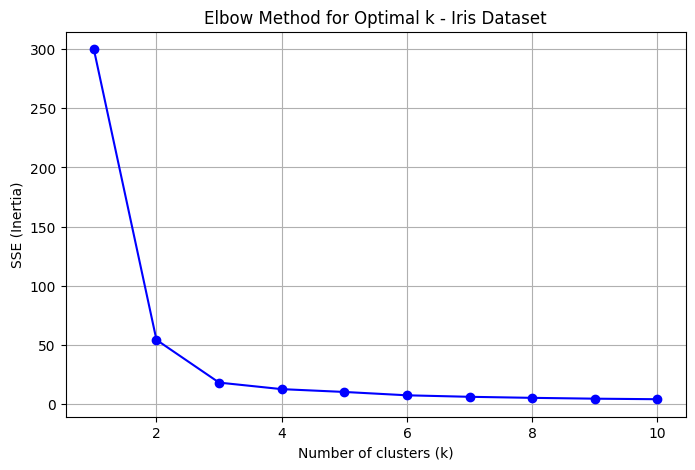

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Use only petal features
X = df[['petal length (cm)', 'petal width (cm)']]

# Step 3: Feature scaling (important for distance-based algorithms like KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow method to find optimal k
sse = []   # Sum of Squared Errors (Inertia)
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

# Step 5: Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k - Iris Dataset')
plt.grid(True)
plt.show()



In [31]:
for i, val in enumerate(sse, 1):
    print(f"k = {i}, SSE = {val:.2f}")


k = 1, SSE = 300.00
k = 2, SSE = 54.17
k = 3, SSE = 18.03
k = 4, SSE = 12.50
k = 5, SSE = 10.12
k = 6, SSE = 7.28
k = 7, SSE = 6.01
k = 8, SSE = 5.13
k = 9, SSE = 4.43
k = 10, SSE = 3.97


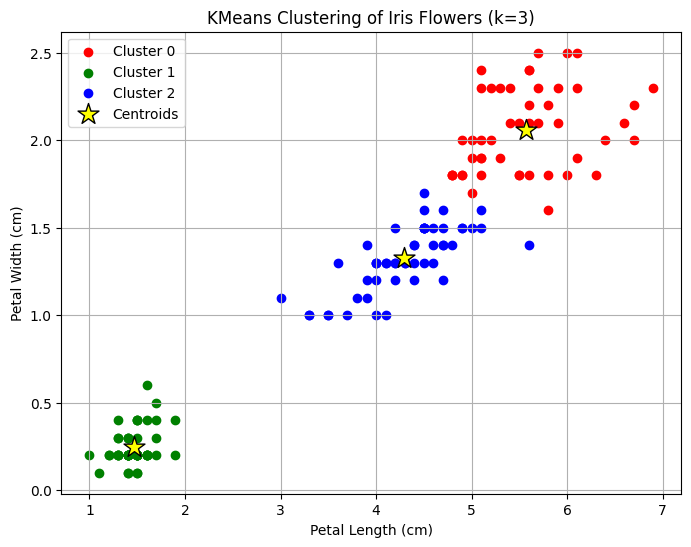

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Select petal features
X = df[['petal length (cm)', 'petal width (cm)']]

# Step 3: Scale features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply KMeans with k = 3 (optimal from elbow method)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Plot the clusters
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for i in range(k):
    plt.scatter(df[df['Cluster'] == i]['petal length (cm)'],
                df[df['Cluster'] == i]['petal width (cm)'],
                label=f'Cluster {i}', color=colors[i])

# Step 6: Plot cluster centroids
centroids = kmeans.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids)

plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 1],
            s=250, marker='*', c='yellow', edgecolor='black', label='Centroids')

# Step 7: Label the graph
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KMeans Clustering of Iris Flowers (k=3)')
plt.legend()
plt.grid(True)
plt.show()


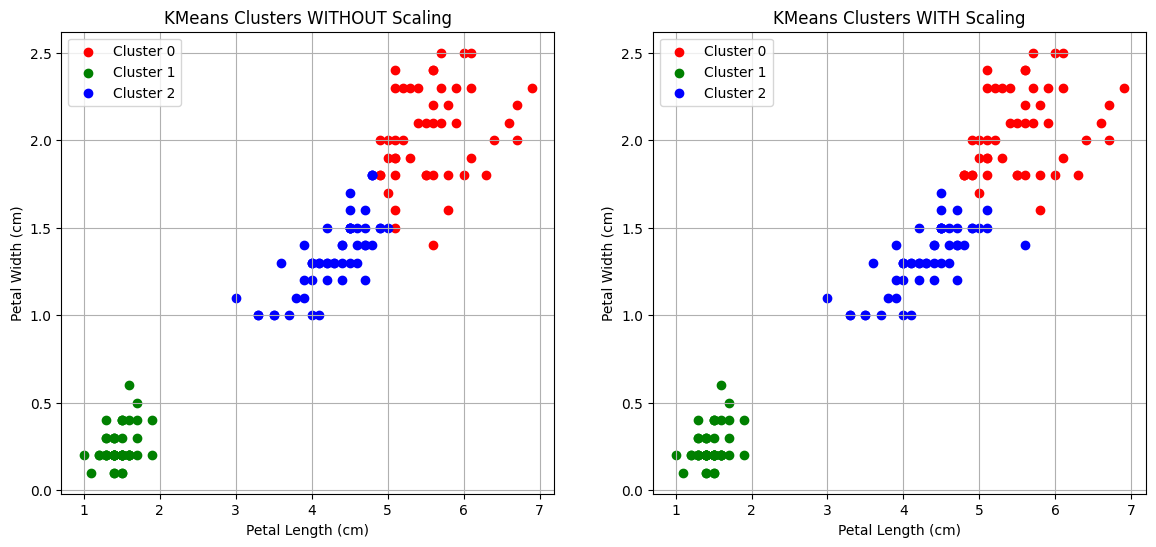

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df[['petal length (cm)', 'petal width (cm)']]

# KMeans without scaling
kmeans_raw = KMeans(n_clusters=3, random_state=42)
df['Cluster_raw'] = kmeans_raw.fit_predict(X)

# KMeans with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
df['Cluster_scaled'] = kmeans_scaled.fit_predict(X_scaled)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14,6))

colors = ['red', 'green', 'blue']

# Without scaling
for i in range(3):
    axes[0].scatter(df[df['Cluster_raw']==i]['petal length (cm)'],
                    df[df['Cluster_raw']==i]['petal width (cm)'],
                    label=f'Cluster {i}', color=colors[i])
axes[0].set_title('KMeans Clusters WITHOUT Scaling')
axes[0].set_xlabel('Petal Length (cm)')
axes[0].set_ylabel('Petal Width (cm)')
axes[0].legend()
axes[0].grid(True)

# With scaling
for i in range(3):
    axes[1].scatter(df[df['Cluster_scaled']==i]['petal length (cm)'],
                    df[df['Cluster_scaled']==i]['petal width (cm)'],
                    label=f'Cluster {i}', color=colors[i])
axes[1].set_title('KMeans Clusters WITH Scaling')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].legend()
axes[1].grid(True)

plt.show()


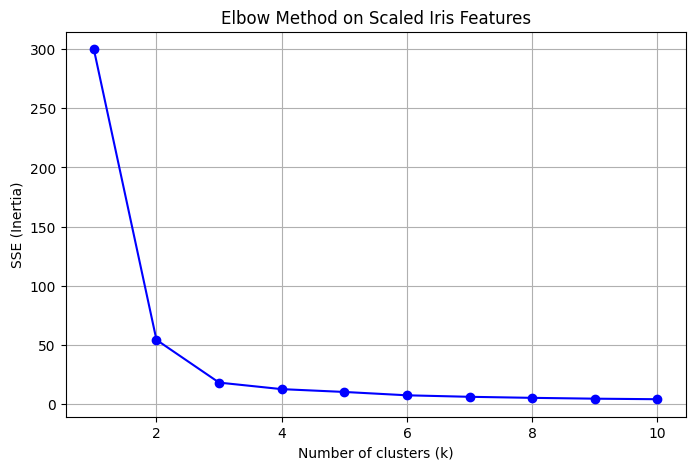

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of k values to test
k_range = range(1, 11)
sse = []

# Compute SSE for each k
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)  # scaled features
    sse.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method on Scaled Iris Features')
plt.grid(True)
plt.show()
